In [1]:
import numpy as np
import networkx as nx
import matplotlib.pylab as plt
import os
import random
import math
import pandas as pd
import scipy
import numpy.ma as ma
import itertools
import community
# from infomap import infomap
import os
import rpy2.robjects as robjects

/usr/local/lib/python3.5/dist-packages/pandas/core/computation/__init__.py:18: UserWarning: The installed version of numexpr 2.4.3 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


In [2]:
def ldata(archive):
    f=open(archive)
    data=[]
    for line in f:
        line=line.strip()
        col=line.split()
        data.append(col)
    return data

In [3]:
data_total=ldata('crimen/red_crimenes')

In [4]:
crimenes=[]
personas=[]
for i in data_total:
    crimenes.append(i[1]+'cr')
    personas.append(i[0])
print(data_total)
print(crimenes)

[['1', '1'], ['1', '2'], ['1', '3'], ['1', '4'], ['2', '5'], ['2', '6'], ['2', '7'], ['2', '8'], ['2', '9'], ['2', '10'], ['2', '11'], ['2', '12'], ['2', '13'], ['2', '14'], ['2', '15'], ['2', '16'], ['2', '17'], ['2', '18'], ['2', '19'], ['2', '20'], ['2', '21'], ['2', '22'], ['2', '23'], ['2', '24'], ['2', '25'], ['2', '26'], ['3', '27'], ['4', '24'], ['5', '19'], ['6', '28'], ['7', '29'], ['8', '30'], ['9', '31'], ['10', '32'], ['10', '33'], ['10', '34'], ['10', '35'], ['10', '36'], ['10', '37'], ['10', '38'], ['10', '39'], ['11', '31'], ['12', '40'], ['12', '41'], ['12', '42'], ['13', '42'], ['14', '42'], ['15', '43'], ['16', '44'], ['17', '45'], ['17', '46'], ['17', '47'], ['17', '48'], ['17', '49'], ['18', '50'], ['19', '51'], ['20', '51'], ['21', '52'], ['21', '53'], ['22', '54'], ['23', '55'], ['24', '56'], ['25', '56'], ['26', '57'], ['27', '58'], ['28', '59'], ['29', '60'], ['30', '61'], ['31', '62'], ['32', '63'], ['33', '8'], ['33', '10'], ['34', '64'], ['35', '63'], ['36',

In [5]:
sexos = ldata('crimen/moreno_crime/ent.moreno_crime_crime.person.sex')
nombres = ldata('crimen/moreno_crime/ent.moreno_crime_crime.person.name')
roles = ldata('crimen/moreno_crime/rel.moreno_crime_crime.person.role')

In [9]:
personas_num=[]
usados=[]
h=0
for i in personas:
    if i not in usados:
        h=h+1
        usados.append(i)
        personas_num.append(h)
print(usados)
print(personas_num)
print(len(personas_num))
print(len(nombres))

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', '155', '156', '157', '158', '

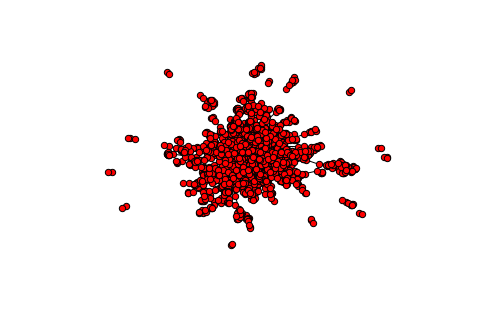

In [6]:
g = nx.Graph ()
g.add_nodes_from(list(set(personas)))
g.add_nodes_from(list(set(crimenes)))

for i,j in zip(personas,crimenes):
    g.add_edge (i,j)


nx.draw(g,node_size = 40,with_labels=False, font_weight='bold')
plt.show()

In [16]:
# print(nombres[829])
for i in personas_num:
    g.nodes[str(i)]['color']=1
    g.nodes[str(i)]['nombre']=nombres[i-1][0]
    g.nodes[str(i)]['rol']=roles[i-1]
    g.nodes[str(i)]['sexo']=sexos[i-1]

for crimen in g.nodes():
    if crimen in crimenes:
        g.node[crimen]['color']=0

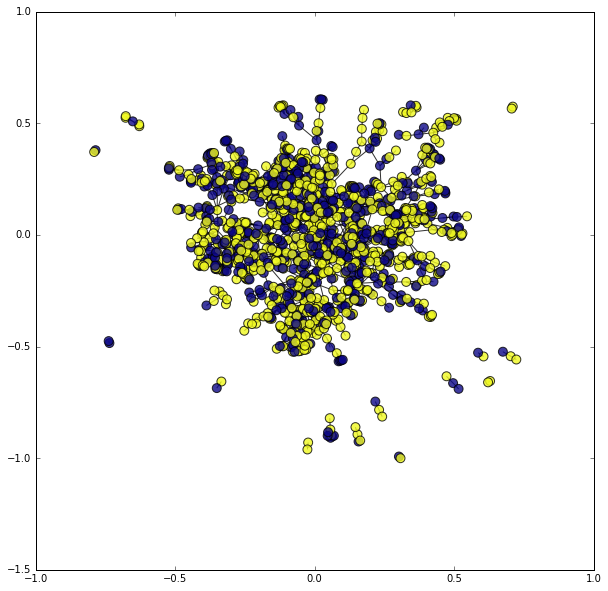

In [19]:
plt.figure(figsize=(10,10))
nx.draw_networkx(g, cmap=plt.get_cmap('plasma'),
                 node_color=list(nx.get_node_attributes(g, "color").values()),
                 node_size=80,
                 alpha=0.8,
                 with_labels=False)
plt.show()